In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def polynomial_dataframe(input_feature,degree):
           
    poly_df = pd.DataFrame()
    poly_df['Degree_1'] = input_feature
        
    if degree >1:
        
        for i in range(2,degree+1):
            
            poly_df['Degree_'+str(i)] = input_feature**i
            
    return poly_df         

In [3]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [11]:
train_set = pd.read_csv('wk3_kc_house_train_data.csv',dtype=dtype_dict)
test_set = pd.read_csv('wk3_kc_house_test_data.csv',dtype=dtype_dict)
sales = pd.read_csv('kc_house_data.csv',dtype = dtype_dict).sort_values('sqft_living')
sales['constant'] = 1
train_set['constant'] = 1
test_set['constant'] =1 

In [12]:
def compute_cost(output,l2_penalty,co_eff):
    
    cost = np.sum((predition - output)**2) + l2_penalty * np.sum(co_eff**2)
    
    return cost

In [13]:
def get_numpy_data(input_data,output):
    
    
    x = input_data.as_matrix()
    
    y = output.as_matrix()
    
    return x,y
    

In [14]:
def predict_output(features,weights):
    
    prediction =  np.dot(features,weights)
    
    return prediction  
    

In [15]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    
    if feature_is_constant == True:
        derivative = 2*np.dot(errors,feature)
    
    else:
        derivative = 2*np.dot(errors,feature) + 2*(l2_penalty*weight)
    
    return derivative

In [16]:
def feature_derivative_ridge_vectorized(errors, feature, weight, l2_penalty):
    derivative = np.zeros(feature.shape[1])
    for j in range(feature.shape[1]):
        
        if j == 0:
            
            derivative[j] = 2*np.dot(errors.T,feature[:,j])
            
        else:
            
            derivative[j] = 2*np.dot(errors.T,feature[:,j]) + 2*(l2_penalty*weight[j])
    
    return derivative

In [19]:
(example_features, example_output) = get_numpy_data(sales[['constant','sqft_living']], sales['price'])
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = (test_predictions - example_output).reshape((-1,1))

In [20]:
feature_derivative_ridge_vectorized(errors,example_features,my_weights,1)


array([ -2.24467493e+10,  -5.65541668e+13])

In [21]:
(example_features, example_output) = get_numpy_data(sales[['constant','sqft_living']], sales['price'])

In [60]:
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output
print(feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False))
# next two lines should print the same values

print(np.sum(errors*example_features[:,1])*2+20.)
print('')
# next two lines should print the same values
print(feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print(np.sum(errors)*2)

-5.6554166816e+13
-5.6554166816e+13

-22446749330.0
-22446749330.0


In [43]:
def gradient_decsent_ridge_reg(input_features,output,initial_weights,step_size,l2_penalty,max_iter =100):
    
    
    weights = np.array(initial_weights)
    #input_feat,output = get_numpy_data(input_features,output)
    
    for i in range(max_iter):   
    
        prediction = predict_output(input_features,weights)  
        errors = prediction - output  
        derivative = feature_derivative_ridge_vectorized(errors,input_features,weights,l2_penalty)
        weights = weights - step_size*derivative
        
    return weights

In [44]:
def gradient_descent_ridge(feature_matrix,output,initial_weights,step_size,l2_penalty,max_iter=100):
    
    weights = np.array(initial_weights)
    
    while max_iter>0:
        
        prediction = predict_output(feature_matrix,weights)
        error = prediction-output
        for  i in range(len(weights)):
            
            if i ==0:
                feature_is_constant = True
                
            else:
                feature_is_constant = False
                
            derivative = feature_derivative_ridge(error,feature_matrix[:,i],weights[i],l2_penalty,feature_is_constant)
            
            weights[i]  = weights[i] - step_size * derivative
            
        max_iter = max_iter-1
        
    return weights

In [45]:
(simple_train_feature_matrix, train_output) = get_numpy_data(train_set[['constant','sqft_living']],train_set['price'])
(simple_test_feature_matrix, test_output) = get_numpy_data(test_set[['constant','sqft_living']],test_set['price'])

In [53]:
simple_weights_0_penalty = gradient_descent_ridge(simple_train_feature_matrix,train_output,initial_weights = np.array([0.,0.]),step_size= 1e-12,l2_penalty=0.0,max_iter=1000)

In [54]:
simple_weights_0_penalty_vec = gradient_decsent_ridge_reg(simple_train_feature_matrix,train_output,initial_weights = np.array([0.,0.]),step_size= 1e-12,l2_penalty=0.0,max_iter=1000)

In [55]:
print(simple_weights_0_penalty)
print(simple_weights_0_penalty_vec)

[ -8.55038595e-02   2.64788506e+02]
[ -8.55038595e-02   2.64788506e+02]


In [51]:
simple_weights_high_penalty = gradient_descent_ridge(simple_train_feature_matrix,train_output,initial_weights = np.zeros(simple_train_feature_matrix.shape[1]),step_size= 1e-12,l2_penalty=1e11,max_iter=1000)
simple_weights_high_penalty_vec = gradient_decsent_ridge_reg(simple_train_feature_matrix,train_output,initial_weights = np.zeros(simple_train_feature_matrix.shape[1]),step_size= 1e-12,l2_penalty=1e11,max_iter=1000)

In [52]:
print(simple_weights_high_penalty)
print(simple_weights_high_penalty_vec)

[  6.96906922  89.30826422]
[  6.96906922  89.30826422]


In [96]:
initial_predictions = predict_output(simple_test_feature_matrix,np.array([0.,0.]))
initial_rss = np.sum((initial_predictions-test_output)**2)
print(initial_rss)

9.27913649763e+14


In [97]:
no_reg_predictions = predict_output(simple_test_feature_matrix,simple_weights_0_penalty)
no_reg_rss = np.sum((no_reg_predictions-test_output)**2)
print(no_reg_rss)

1.43086951736e+14


In [99]:
reg_predictions = predict_output(simple_test_feature_matrix,simple_weights_high_penalty)
reg_rss = np.sum((reg_predictions-test_output)**2)
print(reg_rss)

4.85876997386e+14


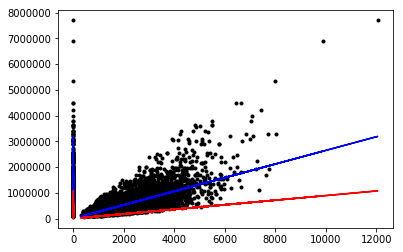

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_train_feature_matrix,train_output,'k.',
        simple_train_feature_matrix,predict_output(simple_train_feature_matrix, simple_weights_0_penalty),'b-',
        simple_train_feature_matrix,predict_output(simple_train_feature_matrix, simple_weights_high_penalty),'r-')

In [71]:
prediction_no_regul = predict_output(test_set[['constant','sqft_living']],np.array([ -1.63113501e-01,2.63024369e+02]))#-8.55038595e-02 , 2.64788506e+02]))

In [72]:
np.sum((prediction_no_regul-test_set['price'])**2)

143065780375630.72

In [62]:
multiple_models_train_input,multiple_train_output = get_numpy_data(train_set[['constant','sqft_living','sqft_living15']],train_set['price'])
multiple_models_test_input,multiple_test_output = get_numpy_data(test_set[['constant','sqft_living','sqft_living15']],test_set['price'])

In [75]:
initial_weights = np.array([0.,0.,0.])
step_size = 1e-12
max_iter = 1000

In [78]:
multiple_weights_0_penalty = gradient_decsent_ridge_reg(multiple_models_train_input,multiple_train_output,initial_weights,step_size,l2_penalty=0,max_iter=1000)
multiple_weights_high_penalty = gradient_decsent_ridge_reg(multiple_models_train_input,multiple_train_output,initial_weights,step_size,l2_penalty=1e11,max_iter=1000)

In [79]:
print(multiple_weights_0_penalty)
print(multiple_weights_high_penalty)

[ -2.22154863e-01   2.46527617e+02   2.03795399e+01]
[  5.32706595  70.80524334  61.63875935]


In [80]:
initial_predictions =predict_output(multiple_models_test_input,initial_weights)
initial_rss = np.sum((initial_predictions-multiple_test_output)**2)
print(initial_rss)

9.27913649763e+14


In [93]:
no_regularization_predictions =predict_output(multiple_models_test_input,multiple_weights_0_penalty)
no_regularization_rss = np.sum((no_regularization_predictions-multiple_test_output)**2)
print(no_regularization_rss)

1.42759126397e+14


In [95]:
regularization_predictions =predict_output(multiple_models_test_input,multiple_weights_high_penalty)
regularization_rss = np.sum((regularization_predictions-multiple_test_output)**2)
print(regularization_rss)

3.56770519506e+14


In [86]:
no_regularization_predictions[0]-multiple_test_output[0]

191644.07502822403

In [87]:
regularization_predictions[0]-multiple_test_output[0]

-41856.128182277898